In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
#
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
#
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [19]:
data = pd.read_csv("data-knn5.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
# Drop Unnecessary columns
data.drop(["Unnamed: 32","id"],axis=1,inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
# Change object to integer:
data["diagnosis"] = [1 if item == "M" else 0  for item in data["diagnosis"]]

In [22]:
y = data["diagnosis"]
x = data.drop(["diagnosis"],axis=1)

In [23]:
columns = x.columns.tolist()

In [24]:
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x)

In [25]:
X_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

In [26]:
outlier_score.head()

,score
0,-1.422440
1,-1.066782
2,-0.978948
3,-1.596933
4,-1.069936


In [27]:
# So make threshold: we decide about max and min of "outlier_score"
threshold = -2
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()

In [28]:
# Radius for our outliers
radius = (X_score.max()-X_score)/(X_score.max()-X_score.min())

In [29]:
x = x.drop(outlier_index)
y = y.drop(outlier_index)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [31]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test  = sc.transform(x_test) 

In [32]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [33]:
knn = KNeighborsClassifier( )
k_range = list(range(1,10))
weights_options = ['uniform','distance']
k_grid = dict(n_neighbors=k_range, weights = weights_options)
grid = GridSearchCV(knn, k_grid, cv=10, scoring = 'precision')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             scoring='precision')

In [40]:
grid.score(X_train, y_train)

1.0

In [41]:
grid.score(X_test, y_test)

1.0

In [42]:
grid.predict(X_train)

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [43]:
grid.predict(X_test)

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [44]:
print ("Best Parameters: ",str(grid.best_params_))

Best Parameters:  {'n_neighbors': 2, 'weights': 'uniform'}


In [45]:
print ("Best Estimators: ",str(grid.best_estimator_))

Best Estimators:  KNeighborsClassifier(n_neighbors=2)


In [46]:
#Elbow method

testing_error_amount= []


for k in range (1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    
    y_pred_test = knn_model.predict(X_test)
    
    test_error=1- accuracy_score(y_test, y_pred_test)
    testing_error_amount.append(test_error)

In [47]:
testing_error_amount

[0.048128342245989275,
 0.048128342245989275,
 0.04278074866310155,
 0.053475935828877,
 0.04278074866310155,
 0.053475935828877,
 0.048128342245989275,
 0.053475935828877,
 0.048128342245989275,
 0.053475935828877,
 0.04278074866310155,
 0.048128342245989275,
 0.048128342245989275,
 0.048128342245989275,
 0.048128342245989275,
 0.053475935828877,
 0.053475935828877,
 0.053475935828877,
 0.053475935828877,
 0.053475935828877,
 0.053475935828877,
 0.05882352941176472,
 0.05882352941176472,
 0.05882352941176472,
 0.05882352941176472,
 0.05882352941176472,
 0.05882352941176472,
 0.05882352941176472,
 0.05882352941176472]

Text(0.5, 0, 'K Value')

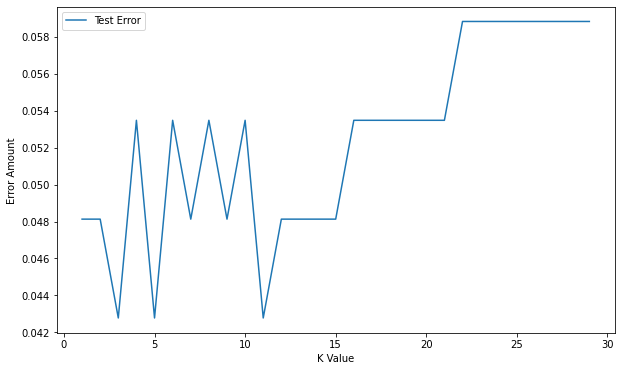

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), testing_error_amount, label='Test Error')
plt.legend()
plt.ylabel('Error Amount')
plt.xlabel('K Value')

In [51]:
#pipeline

scaler= StandardScaler()

knn= KNeighborsClassifier()
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [52]:
operations= [('scaler', scaler), ('knn', knn)]

In [53]:
from sklearn.pipeline import Pipeline
operations= [('scaler', scaler), ('knn', knn)]
pipe= Pipeline(operations)


from sklearn.model_selection import GridSearchCV

k_values= list(range(1, 20))
param_grid= {'knn__n_neighbors': k_values}
full_cv_classifier= GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [54]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=3))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=3),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 3,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [55]:
# finalize the model

scaler= StandardScaler()
knn19= KNeighborsClassifier(n_neighbors=19)
operations= [('scaler', scaler), ('knn19', knn19)]

pipe= Pipeline(operations)

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn19', KNeighborsClassifier(n_neighbors=19))])

In [56]:
pipe_pred= pipe.predict(X_test)

In [57]:
print(classification_report(y_test, pipe_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       120
           1       1.00      0.85      0.92        67

    accuracy                           0.95       187
   macro avg       0.96      0.93      0.94       187
weighted avg       0.95      0.95      0.95       187



In [58]:
pd.DataFrame({'Y_Test':y_test, 'Y_Pred': y_pred})

,Y_Test,Y_Pred
542,0,0
527,0,0
237,1,1
528,0,0
490,0,0
...,...,...
530,0,0
514,1,0
367,0,0
25,1,1


In [59]:
accuracy_score(y_test, y_pred)

0.9572192513368984

In [60]:
confusion_matrix(y_test, y_pred)

array([[120,   0],
       [  8,  59]], dtype=int64)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       120
           1       1.00      0.88      0.94        67

    accuracy                           0.96       187
   macro avg       0.97      0.94      0.95       187
weighted avg       0.96      0.96      0.96       187



In [62]:
scaler= StandardScaler()
knn= KNeighborsClassifier()
knn.get_params().keys()
operations= [('scaler', scaler), ('knn', knn)]
pipe= Pipeline(operations)
k_values= list(range(1, 20))
param_grid= {'knn__n_neighbors': k_values}
full_cv_classifier= GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
full_cv_classifier.fit(X_train, y_train)
full_cv_classifier.best_estimator_.get_params()
full_cv_classifier.cv_results_.keys()



dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [63]:
scaler= StandardScaler()
knn14= KNeighborsClassifier(n_neighbors=14)
operations= [('scaler', scaler), ('knn14', knn14)]

In [64]:
pipe= Pipeline(operations)

In [65]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn14', KNeighborsClassifier(n_neighbors=14))])

In [66]:
pipe_pred= pipe.predict(X_test)
y_pred_knn=pipe_pred

In [67]:
print(classification_report(y_test, pipe_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       120
           1       1.00      0.87      0.93        67

    accuracy                           0.95       187
   macro avg       0.97      0.93      0.95       187
weighted avg       0.96      0.95      0.95       187



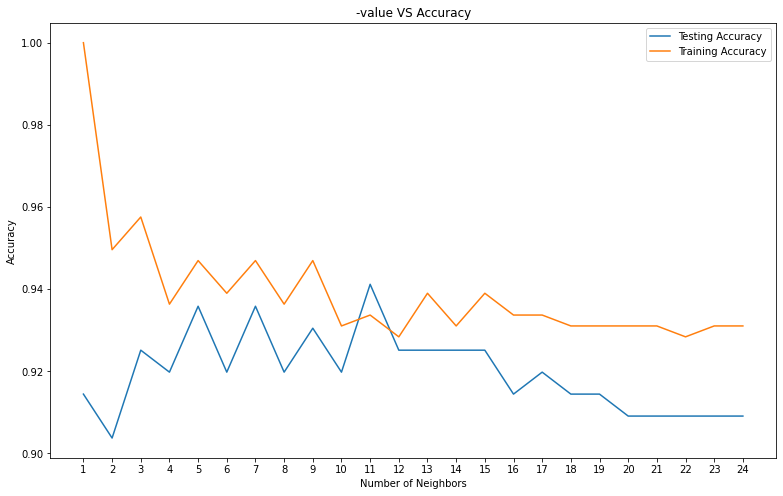

Best accuracy is 0.9411764705882353 with K = 11


In [17]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [18]:
knn_cm = confusion_matrix(y_test,y_pred)
knn_acc = metrics.accuracy_score(y_test, y_pred)
print(knn_cm)
print(knn_acc)

[[120   0]
 [  8  59]]
0.9572192513368984


In [19]:
# Tuning Decision Tree Model
n_neighbors = [5,7,9,11,13,15,17,19,21]
weights = ["uniform","distance"]
metric = ["euclidean","manhattan","minkowski"]
param_grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

In [20]:
knn = KNeighborsClassifier()
gs = GridSearchCV(estimator=knn,param_grid=param_grid,scoring="accuracy", cv=10)
grid_search = gs.fit(x_train,y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Score:",best_score)
print("Best Parameters:",best_parameters)

Best Score: 0.9414651493598862
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [21]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(x_train,y_train)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 7}
Best score: 0.9389206349206348


In [22]:
knn = KNeighborsClassifier(metric='manhattan',n_neighbors=9,weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [23]:
knn_cm = confusion_matrix(y_test,y_pred)
knn_acc = metrics.accuracy_score(y_test, y_pred)
print(knn_cm)
print(knn_acc)

[[119   1]
 [  9  58]]
0.946524064171123


In [24]:
data = pd.read_csv("data-knn5.csv")
# Drop Unnecessary columns
data.drop(["Unnamed: 32","id"],axis=1,inplace=True)
# Change object to integer:
data["diagnosis"] = [1 if item == "M" else 0  for item in data["diagnosis"]]
y = data["diagnosis"]
x = data.drop(["diagnosis"],axis=1)

In [25]:
# PCA needs scaled data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [26]:
# Build PCA
pca = PCA(n_components = 2)
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)

In [27]:
pca_data = pd.DataFrame(X_reduced_pca,columns=["p1","p2"])
pca_data["diagnosis"] = y

In [28]:
pca_data.head()

,p1,p2,diagnosis
0,9.192837,1.948583,1
1,2.387802,-3.768172,1
2,5.733896,-1.075174,1
3,7.122953,10.275589,1
4,3.935302,-1.948072,1


In [29]:
y_pca = pca_data.diagnosis
x_pca = pca_data.drop(["diagnosis"],axis=1)

In [30]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y_pca, test_size=0.33, random_state=42)

In [31]:
knn_pca = KNeighborsClassifier()
knn_pca.fit(x_train_pca, y_train_pca)
y_pred_pca = knn_pca.predict(x_test_pca)

In [32]:
knn_cm_pca = confusion_matrix(y_test_pca,y_pred_pca)
knn_acc_pca = metrics.accuracy_score(y_test_pca, y_pred_pca)
print(knn_cm_pca)
print(knn_acc_pca)

[[113   8]
 [  1  66]]
0.9521276595744681
